# ex 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()
pi = np.pi


In [1]:
def stable_random_variables_a(alpha):
    if alpha == 1:
        Omega = np.random.uniform(-pi/2, pi/2)
        return np.tan(Omega)
    else:
        Omega = np.random.uniform(-pi/2, pi/2)
        W = np.random.exponential(1)
        return np.sin(alpha*Omega)/np.cos(Omega)**(1/alpha)*(np.cos((alpha-1)*Omega)/W)**((1-alpha)/alpha)


def stable_random_variables_b(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha

    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega)) / \
            (np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b


def stable_random_variables_0(alpha, beta, gamma, delta):
    Z = stable_random_variables_a(alpha, beta)
    if alpha == 1:
        return gamma*Z+delta
    else:
        return gamma*(Z - beta*np.tan(pi*alpha/2)) + delta


def stable_random_variables_1(alpha, beta, gamma, delta):
    Z = stable_random_variables_b(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta


def stable_random_variables(alpha, beta, gamma=1, delta=0, stable_type=1):
    if stable_type == 1:
        return stable_random_variables_1(alpha, beta, gamma, delta)
    elif stable_type == 0:
        return stable_random_variables_0(alpha, beta, gamma, delta)
    else:
        raise ValueError("Select bad stable_type!!!")


def multivariate_stable_distributions(alpha, array):
    n = array.shape[0]
    Z = [stable_random_variables(alpha=alpha, beta=1) for _ in range(n)]
    y = np.random.uniform(0, 1)
    if alpha == 1:
        return np.sum(array[:, 1:].T*array[:, 0]**(1/alpha) * Z, axis=1)
    else:
        return np.sum(array[:, 1:].T*array[:, 0]**(1/alpha)*(Z + 2/pi*np.log(array[:, 0])), axis=1)


In [43]:
def codiffence(X, Y):
    # XminusY = np.array([X - Y_i for Y_i in Y])
    XminusY = X - Y
    EexpX = np.mean(np.exp(1j*X))
    EexpY = np.mean(np.exp(-1j*Y))

    EexpXminusY = np.mean(np.exp(1j*XminusY))
    tau = np.log(EexpXminusY) - np.log(EexpX) - np.log(EexpY)
    return tau


In [44]:
def sub_gaussian_not_sim(alpha, beta, gamma, delta, sigmas=[1, 1], size=[1, 1]):
    sqrt_A = [[stable_random_variables(
        alpha/2, beta, gamma, delta)**(1/2)] for _ in range(size[0])]
    return sqrt_A * np.random.normal(0, sigmas, size)


In [45]:
alpha = 1.1
beta = 1
gamma = np.cos(pi*alpha/4)**(2/alpha)
delta = 0
sigmas = 1
d = 2
n = 5000

X_5_1 = sub_gaussian_not_sim(alpha, beta, gamma, delta, sigmas, size=[n, d])


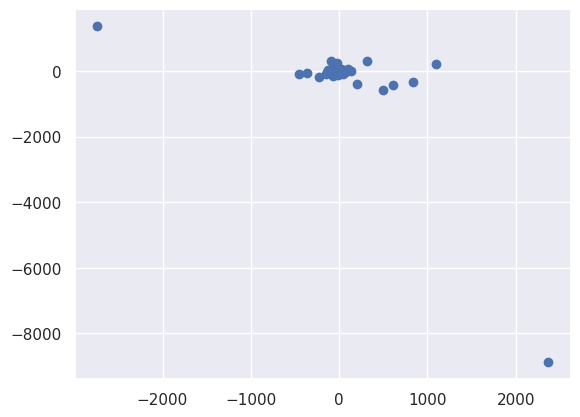

In [46]:
plt.scatter(X_5_1[:, 0], X_5_1[:, 1])
plt.show()


In [48]:
codiffence(X_5_1[:, 0], X_5_1[:, 1])


(0.35551003479264875-0.007050127047829481j)

In [60]:
X = np.random.normal(0, 1, 10000)
Y = np.random.normal(0, 1, 10000)
Y[:2500] = X[:2500] 
np.cov([X,Y])


array([[1.00606312, 0.24758447],
       [0.24758447, 1.00456578]])

In [61]:
codiffence(X, Y)

(0.3541602853799738+2.905243392296343e-05j)

In [74]:
alpha = 1.9
arr1 = np.array([
    [1/4, 1,  0],
    [1/4, 0,  1],
    [1/4, -1,  0],
    [1/4, 0, -1],
])


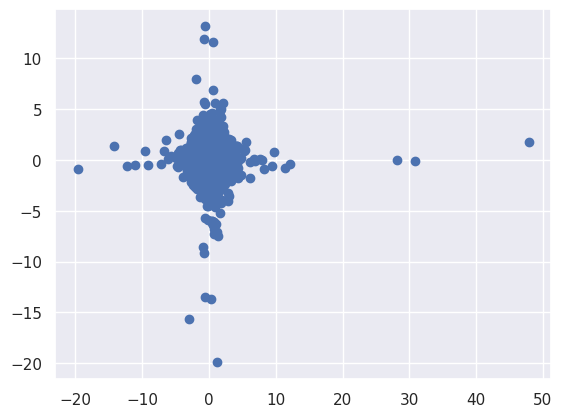

In [75]:
X = np.array([multivariate_stable_distributions(alpha, arr1)
             for _ in range(10000)])
test = X[:, 1].copy()
test[X[:, 0] > 30] = 113
plt.scatter(X[:, 0], X[:, 1])
plt.show()


In [76]:
codiffence(X[:, 0], X[:, 1])


(0.007815777482448438-0.010790163436472298j)

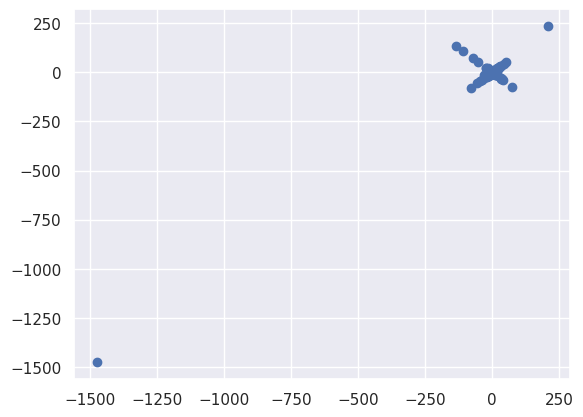

In [219]:
alpha = 0.9
arr1 = np.array([
    [1/4, np.sqrt(2)/2,  np.sqrt(2)/2],
    [1/4, -np.sqrt(2)/2,  np.sqrt(2)/2],
    [1/4, -np.sqrt(2)/2, -np.sqrt(2)/2],
    [1/4, np.sqrt(2)/2, -np.sqrt(2)/2],
])
X = np.array([multivariate_stable_distributions(alpha, arr1)
             for _ in range(1000)])
plt.scatter(X[:, 0], X[:, 1])
plt.show()


In [41]:
codiffence(X[:, 0], X[:, 1])


(-5.551115123125783e-16-6.071532165918825e-17j)